In [1]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_excel(r'C:\Users\aayus\Documents\GitHub\StochOpt\stochastic-dominance\returns_data.xlsx')
# returns = df.iloc[:,1:].to_numpy()[1:]
# print(returns)

## Question 1

In [3]:
returns = np.array([[ 0.004, -0.025,  0.009,  0.012,  0.047, -0.019,  0.006, -0.037,
         0.025,  0.021,  0.017,  0.019],
       [ 0.014,  0.   , -0.039,  0.016, -0.006,  0.07 , -0.021, -0.022,
         0.019,  0.025,  0.054,  0.04 ],
       [ 0.001,  0.006,  0.005,  0.019,  0.016,  0.057, -0.052,  0.027,
         0.039,  0.   ,  0.011,  0.002],
       [-0.012, -0.021,  0.062,  0.036, -0.002, -0.038,  0.015, -0.003,
         0.024,  0.012,  0.048, -0.007],
       [-0.043,  0.005,  0.023,  0.   ,  0.023,  0.04 ,  0.034,  0.029,
        -0.013, -0.04 ,  0.011,  0.003],
       [ 0.015, -0.027, -0.01 , -0.027,  0.002,  0.038,  0.056, -0.004,
         0.08 ,  0.001,  0.013,  0.026],
       [-0.001,  0.011,  0.056, -0.024,  0.019, -0.048, -0.015,  0.019,
         0.062,  0.023,  0.002, -0.017],
       [ 0.039,  0.03 ,  0.003, -0.004,  0.016, -0.021,  0.003,  0.018,
        -0.026, -0.022,  0.026,  0.073],
       [ 0.017,  0.02 , -0.024, -0.004,  0.019,  0.039, -0.03 ,  0.025,
         0.021,  0.054, -0.011,  0.056],
       [ 0.108, -0.003,  0.061,  0.008,  0.024, -0.037, -0.013,  0.053,
        -0.009, -0.021,  0.026, -0.009]])

In [4]:
assets = 10
senarios = 12


In [5]:
eq_weights = (1/assets)*(np.ones((assets,1)))
eq_returns = np.sort(((returns.T)@eq_weights).flatten())

sngl_weight = np.zeros((assets,1))
sngl_weight[7,:] = 1
sngl_returns = np.sort(((returns.T)@sngl_weight).flatten())

investment_array = np.array([0,1,1,0,0,1,0,1,1,0])
mul_weight = (1/(np.sum(investment_array)))*investment_array
mul_returns = np.sort(((returns.T)@mul_weight).flatten())


# first order dominant 

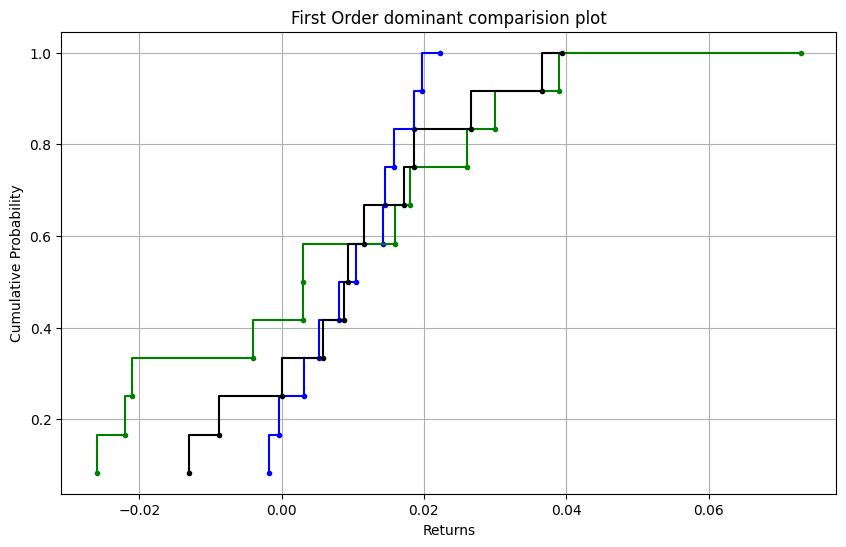

In [6]:
eq_cum_probs = np.arange(1, len(eq_returns) + 1) / len(eq_returns)
sngl_cum_probs = np.arange(1, len(sngl_returns) + 1) / len(sngl_returns)
mul_cum_probs = np.arange(1, len(mul_returns) + 1) / len(mul_returns)

# Plot cumulative probability plot
plt.figure(figsize=(10, 6))
plt.step(eq_returns, eq_cum_probs, marker='.', linestyle='-', color='b',label='equally weighted')
plt.step(sngl_returns, sngl_cum_probs, marker='.', linestyle='-', color='g',label="asset 8")
plt.step(mul_returns, mul_cum_probs, marker='.', linestyle='-', color='k',label="asset 2,3,6,8,9")
plt.title("First Order dominant comparision plot")
plt.xlabel("Returns")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.show()

In [7]:
eq_V = []
for eta in eq_returns:
    v_j = np.sum((eta-eq_returns)[eq_returns< eta])/(len(eq_returns))
    eq_V.append(v_j)

sngl_V = []
for eta in sngl_returns:
    v_j = np.sum((eta-sngl_returns)[sngl_returns< eta])/(len(sngl_returns))
    sngl_V.append(v_j)

mul_V = []
for eta in mul_returns:
    v_j = np.sum((eta-mul_returns)[mul_returns< eta])/(len(mul_returns))
    mul_V.append(v_j)

In [8]:
eq_x_last_two = eq_returns[-2:]
eq_y_last_two = eq_V[-2:]

# Calculate the slope (dy/dx) between the last two points
slope = (eq_y_last_two[1] - eq_y_last_two[0]) / (eq_x_last_two[1] - eq_x_last_two[0])

# Define an extrapolation length (change this to extend more or less)
extrapolation_length = (eq_x_last_two[1] - eq_x_last_two[0]) * 38

# Calculate the new extrapolated point
eq_x_extrapolated = eq_x_last_two[1] + extrapolation_length
eq_y_extrapolated = eq_y_last_two[1] + slope * extrapolation_length

sngl_x_last_two = sngl_returns[-2:]
sngl_y_last_two = sngl_V[-2:]

# Calculate the slope (dy/dx) between the last two points
slope = (sngl_y_last_two[1] - sngl_y_last_two[0]) / (sngl_x_last_two[1] - sngl_x_last_two[0])

# Define an extrapolation length (change this to extend more or less)
extrapolation_length = (sngl_x_last_two[1] - sngl_x_last_two[0]) * 1.05

# Calculate the new extrapolated point
sngl_x_extrapolated = sngl_x_last_two[1] + extrapolation_length
sngl_y_extrapolated = sngl_y_last_two[1] + slope * extrapolation_length


mul_x_last_two = mul_returns[-2:]
mul_y_last_two = mul_V[-2:]

# Calculate the slope (dy/dx) between the last two points
slope = (mul_y_last_two[1] - mul_y_last_two[0]) / (mul_x_last_two[1] - mul_x_last_two[0])

# Define an extrapolation length (change this to extend more or less)
extrapolation_length = (mul_x_last_two[1] - mul_x_last_two[0]) * 26

# Calculate the new extrapolated point
mul_x_extrapolated = mul_x_last_two[1] + extrapolation_length
mul_y_extrapolated = mul_y_last_two[1] + slope * extrapolation_length


# Second order dominance plot

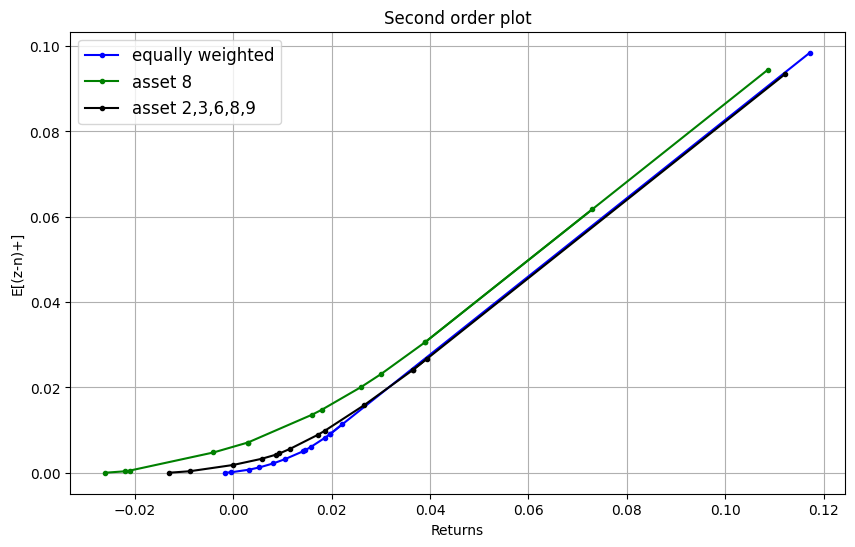

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(eq_returns,eq_V , marker='.', linestyle='-', color='b',label='equally weighted')
plt.plot([eq_x_last_two[0], eq_x_extrapolated], [eq_y_last_two[0], eq_y_extrapolated], marker='.', linestyle='-', color='b')
plt.plot(sngl_returns, sngl_V, marker='.', linestyle='-', color='g',label="asset 8")
plt.plot([sngl_x_last_two[0], sngl_x_extrapolated], [sngl_y_last_two[0], sngl_y_extrapolated], marker='.', linestyle='-', color='g')
plt.plot(mul_returns, mul_V, marker='.', linestyle='-', color='k',label="asset 2,3,6,8,9")
plt.plot([mul_x_last_two[0], mul_x_extrapolated], [mul_y_last_two[0], mul_y_extrapolated], marker='.', linestyle='-', color='k')
plt.title("Second order plot")
plt.xlabel("Returns")
plt.ylabel("E[(z-n)+]")
plt.grid(True)
plt.legend(fontsize=12, loc='upper left')
plt.show()

# Add labels and title